In [2]:
import pandas as pd
file_path = "C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\TED\\TED_ALL.csv"
df = pd.read_csv(file_path)

C:\Users\afont\AppData\Local\Temp\ipykernel_14988\2759054057.py:3: DtypeWarning: Columns (15,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
print(df.columns)

Index(['index', 'ID_NOTICE_CAN', 'TED_NOTICE_URL', 'YEAR', 'ID_TYPE',
       'DT_DISPATCH', 'XSD_VERSION', 'CANCELLED', 'CORRECTIONS',
       'B_MULTIPLE_CAE', 'CAE_NAME', 'CAE_NATIONALID', 'CAE_ADDRESS',
       'CAE_TOWN', 'CAE_POSTAL_CODE', 'CAE_GPA_ANNEX', 'ISO_COUNTRY_CODE',
       'ISO_COUNTRY_CODE_GPA', 'B_MULTIPLE_COUNTRY', 'ISO_COUNTRY_CODE_ALL',
       'CAE_TYPE', 'EU_INST_CODE', 'MAIN_ACTIVITY', 'B_ON_BEHALF',
       'B_INVOLVES_JOINT_PROCUREMENT', 'B_AWARDED_BY_CENTRAL_BODY',
       'TYPE_OF_CONTRACT', 'TAL_LOCATION_NUTS', 'B_FRA_AGREEMENT',
       'FRA_ESTIMATED', 'B_FRA_CONTRACT', 'B_DYN_PURCH_SYST', 'CPV',
       'MAIN_CPV_CODE_GPA', 'ID_LOT', 'ADDITIONAL_CPVS', 'B_GPA',
       'GPA_COVERAGE', 'LOTS_NUMBER', 'VALUE_EURO', 'VALUE_EURO_FIN_1',
       'VALUE_EURO_FIN_2', 'B_EU_FUNDS', 'TOP_TYPE', 'B_ACCELERATED',
       'OUT_OF_DIRECTIVES', 'CRIT_CODE', 'CRIT_PRICE_WEIGHT', 'CRIT_CRITERIA',
       'CRIT_WEIGHTS', 'B_ELECTRONIC_AUCTION', 'NUMBER_AWARDS', 'ID_AWARD',
       'I

In [6]:
import pandas as pd
from tqdm import tqdm
num_iterations = len(df['ID_NOTICE_CAN'].unique()) // 1000
results_list = []
with tqdm(total=num_iterations) as pbar:
    for i in range(num_iterations):
        idnoticecan_chunk = df['ID_NOTICE_CAN'].unique()[1000 * i: 1000 * (i + 1)] 
        filtered_df = df[df['ID_NOTICE_CAN'].isin(idnoticecan_chunk)]
        result = filtered_df.groupby('ID_NOTICE_CAN').agg(lambda x: 1 if x.dropna().nunique() <= 1 else 0)
        result.to_csv('temp_results.csv', mode='a', index=False, header=not bool(i))
        results_list.append(result)
        pbar.update(1)
result=pd.concat(results_list)
result.to_csv('final_results.csv', index=False)
#Est. 3.6h

100%|██████████| 1354/1354 [3:48:17<00:00, 10.12s/it]  


In [2]:
import pandas as pd
file_path = "C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Scripts\\final_results.csv"
result = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)

sum_per_column = result.sum()
num_unique_id_can = result.shape[0]
resultsum = sum_per_column / num_unique_id_can
print(resultsum.to_string())

index                           0.681629
TED_NOTICE_URL                  1.000000
YEAR                            1.000000
ID_TYPE                         1.000000
DT_DISPATCH                     1.000000
XSD_VERSION                     1.000000
CANCELLED                       1.000000
CORRECTIONS                     1.000000
B_MULTIPLE_CAE                  1.000000
CAE_NAME                        1.000000
CAE_NATIONALID                  1.000000
CAE_ADDRESS                     1.000000
CAE_TOWN                        1.000000
CAE_POSTAL_CODE                 1.000000
CAE_GPA_ANNEX                   1.000000
ISO_COUNTRY_CODE                1.000000
ISO_COUNTRY_CODE_GPA            1.000000
B_MULTIPLE_COUNTRY              1.000000
ISO_COUNTRY_CODE_ALL            1.000000
CAE_TYPE                        1.000000
EU_INST_CODE                    1.000000
MAIN_ACTIVITY                   1.000000
B_ON_BEHALF                     1.000000
B_INVOLVES_JOINT_PROCUREMENT    1.000000
B_AWARDED_BY_CEN

In [6]:
columns_with_sum_one = resultsum[resultsum == 1].index.tolist()

print(columns_with_sum_one)

['TED_NOTICE_URL', 'YEAR', 'ID_TYPE', 'DT_DISPATCH', 'XSD_VERSION', 'CANCELLED', 'CORRECTIONS', 'B_MULTIPLE_CAE', 'CAE_NAME', 'CAE_NATIONALID', 'CAE_ADDRESS', 'CAE_TOWN', 'CAE_POSTAL_CODE', 'CAE_GPA_ANNEX', 'ISO_COUNTRY_CODE', 'ISO_COUNTRY_CODE_GPA', 'B_MULTIPLE_COUNTRY', 'ISO_COUNTRY_CODE_ALL', 'CAE_TYPE', 'EU_INST_CODE', 'MAIN_ACTIVITY', 'B_ON_BEHALF', 'B_INVOLVES_JOINT_PROCUREMENT', 'B_AWARDED_BY_CENTRAL_BODY', 'TYPE_OF_CONTRACT', 'B_FRA_AGREEMENT', 'FRA_ESTIMATED', 'B_DYN_PURCH_SYST', 'CPV', 'MAIN_CPV_CODE_GPA', 'B_GPA', 'GPA_COVERAGE', 'LOTS_NUMBER', 'VALUE_EURO', 'VALUE_EURO_FIN_1', 'VALUE_EURO_FIN_2', 'TOP_TYPE', 'B_ACCELERATED', 'OUT_OF_DIRECTIVES', 'B_ELECTRONIC_AUCTION', 'NUMBER_AWARDS']


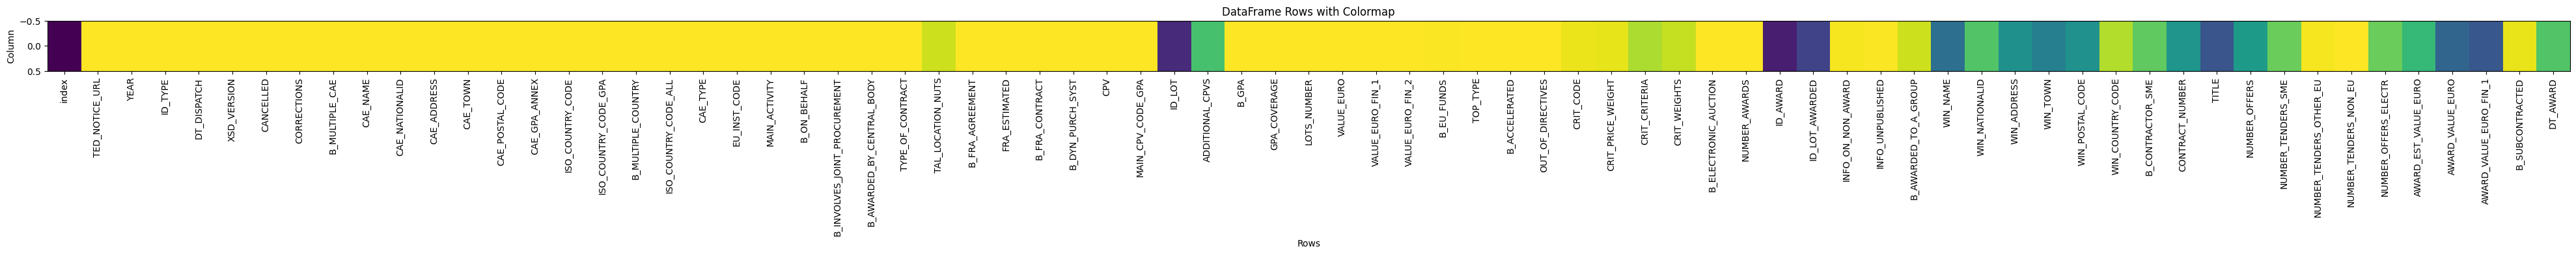

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting the DataFrame using a colormap
fig, ax = plt.subplots(figsize=(50, 1))  # Adjust figure size as needed

# Plot the data
im = ax.imshow(resultsum.values.reshape(1, -1), cmap='viridis', aspect='auto')

# Display column values vertically at the bottom
ax.set_xticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)
ax.xaxis.tick_bottom()  # Move ticks to the bottom


plt.xlabel('Rows')
plt.ylabel('Column')
plt.title('DataFrame Rows with Colormap')
plt.show()

In [27]:
print(df.shape)

(5099613, 76)
